<a href="https://colab.research.google.com/github/Daps2831/Machine-Learning/blob/main/Week_1_Automobile_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount File

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd

# Ganti path sesuai lokasi file di Google Drive
# note: dataset obesity_level diambil dari kaggle
file_path = "/content/drive/MyDrive/Dataset/Automobile.csv"
# Membaca file Excel
df = pd.read_csv(file_path)


# Data Visualization & Preprocessing

In [61]:
# Tampilkan kolom kategorikal dan numerikal
print("\n--- Semua Kolom ---")
print(df.columns.tolist())

# Pisahkan kolom numerikal dan kategorikal
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\n--- Kolom Categorikal ---")
print(list(categorical_cols))
print("\n--- Kolom Numerikal ---")
print(list(numerical_cols))


--- Semua Kolom ---
['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'compression-ratio', 'stroke', 'bore', 'fuel-system', 'engine-size', 'num-of-cylinders', 'engine-type', 'curb-weight', 'height', 'width', 'length', 'wheel-base', 'engine-location', 'drive-wheels', 'body-style', 'num-of-doors', 'aspiration', 'fuel-type', 'make', 'normalized-losses', 'symboling']

--- Kolom Categorikal ---
['fuel-system', 'engine-type', 'engine-location', 'drive-wheels', 'body-style', 'aspiration', 'fuel-type', 'make']

--- Kolom Numerikal ---
['price', 'highway-mpg', 'city-mpg', 'peak-rpm', 'horsepower', 'compression-ratio', 'stroke', 'bore', 'engine-size', 'num-of-cylinders', 'curb-weight', 'height', 'width', 'length', 'wheel-base', 'num-of-doors', 'normalized-losses', 'symboling']


In [62]:
print(df.describe())
print(df.info())
print(df.head(10).to_markdown(index=False))

              price  highway-mpg    city-mpg     peak-rpm  horsepower  \
count    201.000000   205.000000  205.000000   203.000000  203.000000   
mean   13207.129353    30.751220   25.219512  5125.369458  104.256158   
std     7947.066342     6.886443    6.542142   479.334560   39.714369   
min     5118.000000    16.000000   13.000000  4150.000000   48.000000   
25%     7775.000000    25.000000   19.000000  4800.000000   70.000000   
50%    10295.000000    30.000000   24.000000  5200.000000   95.000000   
75%    16500.000000    34.000000   30.000000  5500.000000  116.000000   
max    45400.000000    54.000000   49.000000  6600.000000  288.000000   

       compression-ratio      stroke        bore  engine-size  \
count         205.000000  201.000000  201.000000   205.000000   
mean           10.142537    3.255423    3.329751   126.907317   
std             3.972040    0.316717    0.273539    41.642693   
min             7.000000    2.070000    2.540000    61.000000   
25%             8

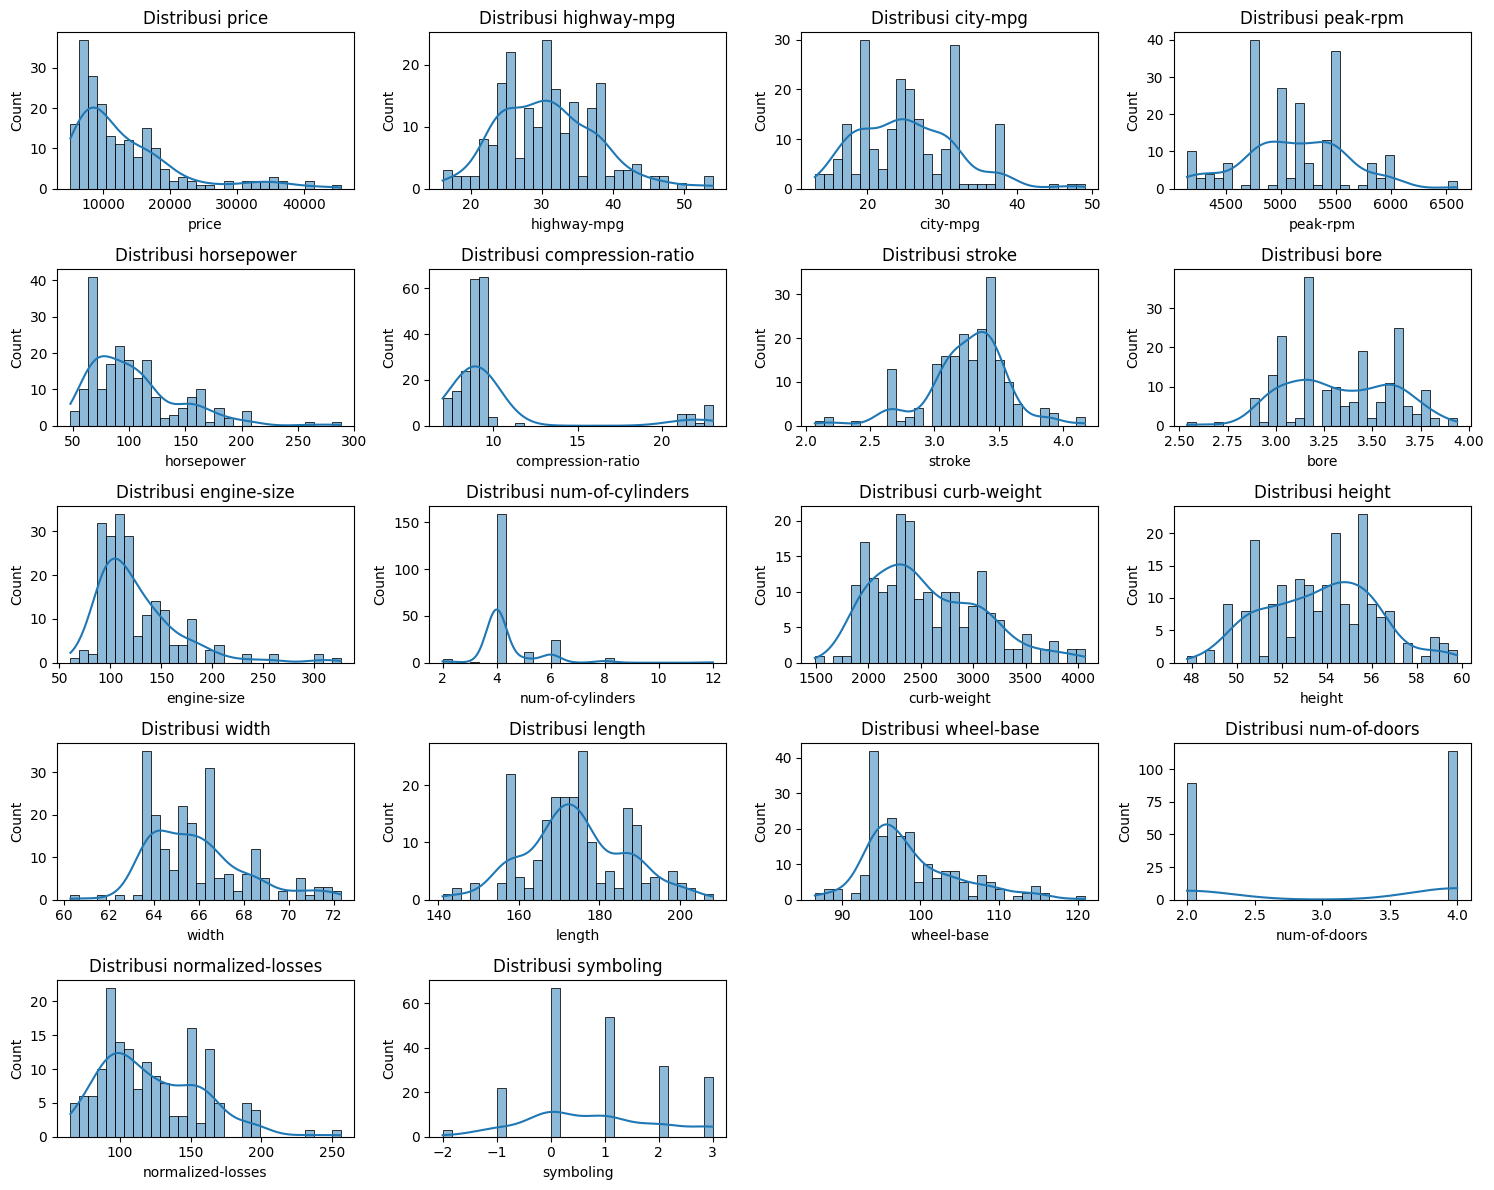

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi data numerik
numeric_columns = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

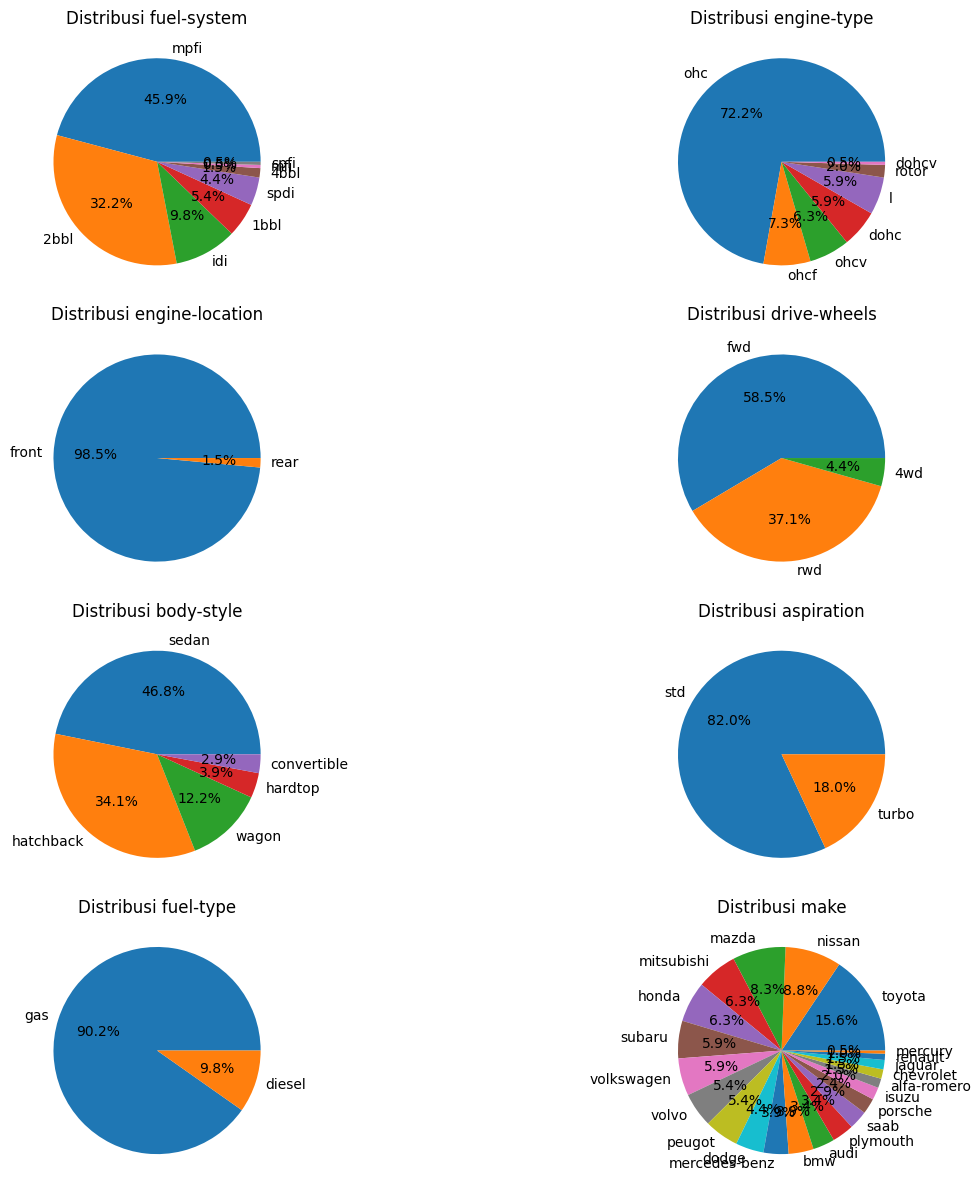

In [64]:
# prompt: minta visualisasi data dalam bentuk piechart untuk gender, CAEC, CALC, MTRANS, 0be1dad

# Visualisasi data dalam bentuk pie chart untuk kolom-kolom yang diminta
columns_to_plot = ['fuel-system', 'engine-type', 'engine-location', 'drive-wheels', 'body-style', 'aspiration', 'fuel-type', 'make']

plt.figure(figsize=(15, 12))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(4, 2, i)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Distribusi {col}')
    plt.ylabel('')  # Hapus label y-axis

plt.tight_layout()
plt.show()

## Cek & Handle Missing Values

In [65]:
# Cek nilai yang hilang
print("\n--- Nilai Hilang ---")
print(df.isnull().sum())
print(f"Jumlah baris sebelum menangani missing values: {len(df)}")


--- Nilai Hilang ---
price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64
Jumlah baris sebelum menangani missing values: 205


In [66]:
# prompt: pengananan nilai hilang kategorikal dengan unknown dan numerikal dengan mean

# Pisahkan kolom numerik dan kategorikal
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Penanganan nilai hilang pada kolom numerik dengan mean
for col in numerical_cols:
    if df[col].isnull().any():
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)

# Penanganan nilai hilang pada kolom kategorikal dengan 'unknown'
for col in categorical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna('unknown')

# Cek kembali nilai yang hilang setelah penanganan
print("\n--- Nilai Hilang Setelah Penanganan ---")
print(df.isnull().sum())
print(f"Jumlah baris setelah menangani missing values: {len(df)}")


--- Nilai Hilang Setelah Penanganan ---
price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64
Jumlah baris setelah menangani missing values: 205


## Cek & Handle Duplicate

In [67]:
# prompt: buatkan kode untuk mengecek data duplikat

# Cek data duplikat
print("\n--- Data Duplikat ---")
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")

# Jika ada data duplikat, Anda bisa menampilkan beberapa contoh
if not duplicate_rows.empty:
    print("\nContoh data duplikat:")
    print(duplicate_rows.head().to_markdown(index=False))

print(f"Jumlah baris sebelum menghapus duplikat: {len(df)}")



--- Data Duplikat ---
Jumlah baris duplikat: 0
Jumlah baris sebelum menghapus duplikat: 205


## Cek & Handle anomali data

In [68]:
# prompt: buatkan kode untuk mengecek apakah ada nilai numerik di kolom kategorikal dengan kolom kategorikal seperti yang sudah diketahui sebelumnya yaitu categorical_cols = ['Gender', 'CAEC', 'CALC', 'MTRANS', '0be1dad']

# Mengecek apakah ada nilai numerik di kolom kategorikal yang spesifik
print("\n--- Mengecek nilai numerik di kolom kategorikal spesifik ---")

# Daftar kolom kategorikal yang ingin diperiksa
specified_categorical_cols = categorical_cols

for col in specified_categorical_cols:
    if col in df.columns:
        # Mengecek apakah tipe data kolom adalah object atau category
        if df[col].dtype == 'object' or df[col].dtype == 'category':
            # Mengecek apakah ada nilai yang bisa dikonversi menjadi numerik
            # Menggunakan pd.to_numeric dengan errors='coerce' akan mengganti nilai non-numerik menjadi NaN
            numeric_check = pd.to_numeric(df[col], errors='coerce')
            # Jika ada nilai yang *tidak* menjadi NaN setelah konversi, berarti ada nilai numerik
            if numeric_check.notna().any():
                print(f"Kolom '{col}': Ditemukan nilai yang bisa dikonversi menjadi numerik.")
                # Anda bisa menampilkan contoh nilai yang terpengaruh jika diinginkan
                print(df[col][numeric_check.notna()].unique())
            else:
                print(f"Kolom '{col}': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.")
        else:
            print(f"Kolom '{col}': Bukan merupakan tipe data kategorikal (object atau category).")
    else:
        print(f"Kolom '{col}': Tidak ditemukan dalam DataFrame.")


--- Mengecek nilai numerik di kolom kategorikal spesifik ---
Kolom 'fuel-system': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.
Kolom 'engine-type': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.
Kolom 'engine-location': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.
Kolom 'drive-wheels': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.
Kolom 'body-style': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.
Kolom 'aspiration': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.
Kolom 'fuel-type': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.
Kolom 'make': Tidak ditemukan nilai yang bisa dikonversi menjadi numerik.


In [69]:
# prompt: buatkan kode apabila ada nilai pada kolom kategorikal yang aneh atau tidak pada umumnya

# Fungsi untuk mengecek nilai aneh/tidak umum pada kolom kategorikal
def check_uncommon_categorical_values(df, categorical_cols):
    print("\n--- Mengecek nilai aneh/tidak umum pada kolom kategorikal ---")
    for col in categorical_cols:
        print(f"\nKolom: {col}")
        # Mendapatkan nilai unik dan hitungannya
        value_counts = df[col].value_counts()
        print(f"Jumlah nilai unik: {len(value_counts)}")
        print("Top 10 nilai unik dan hitungannya:")
        print(value_counts.head(10).to_markdown(numalign="left", stralign="left"))

        # Anda bisa menambahkan logika tambahan di sini untuk mengidentifikasi "nilai aneh"
        # Contoh: nilai yang muncul sangat jarang (frekuensi rendah)
        # Tentukan threshold frekuensi rendah, misal kurang dari 0.1% dari total data
        threshold = 0.001 * len(df)
        uncommon_values = value_counts[value_counts < threshold]

        if not uncommon_values.empty:
            print(f"\nDitemukan nilai dengan frekuensi rendah (kurang dari {threshold:.0f} baris):")
            print(uncommon_values.to_markdown(numalign="left", stralign="left"))
        else:
            print("\nTidak ditemukan nilai dengan frekuensi rendah.")

# Panggil fungsi untuk mengecek kolom kategorikal
check_uncommon_categorical_values(df, categorical_cols)

# Jika Anda ingin menangani nilai aneh ini, Anda bisa mempertimbangkan beberapa pendekatan:
# 1. Mengganti nilai aneh dengan nilai yang paling sering muncul (mode)
# 2. Mengganti nilai aneh dengan 'Other' atau 'Unknown'
# 3. Menghapus baris yang mengandung nilai aneh (hati-hati, bisa mengurangi jumlah data signifikan)
# 4. Mengelompokkan nilai aneh ke dalam kategori yang lebih besar

# Contoh penanganan: Mengganti nilai aneh dengan 'Other' jika frekuensinya di bawah threshold
def handle_uncommon_categorical_values(df, col, threshold_ratio=0.01):
    value_counts = df[col].value_counts()
    threshold = threshold_ratio * len(df)
    uncommon_values = value_counts[value_counts < threshold].index.tolist()

    if uncommon_values:
        print(f"\nMenangani nilai aneh di kolom '{col}': Mengganti {len(uncommon_values)} nilai dengan 'Other'.")
        df[col] = df[col].replace(uncommon_values, 'Other')
        print(f"Nilai unik di kolom '{col}' setelah penanganan:")
        print(df[col].value_counts().to_markdown(numalign="left", stralign="left"))
    else:
        print(f"\nKolom '{col}': Tidak ada nilai aneh untuk ditangani dengan threshold {threshold_ratio}.")
    return df

# # Contoh penerapan penanganan (opsional, jalankan jika Anda ingin menangani nilai aneh)
# # Tentukan threshold_ratio yang sesuai
# threshold_ratio_for_handling = 0.01
# for col in categorical_cols:
#      df = handle_uncommon_categorical_values(df, col, threshold_ratio=threshold_ratio_for_handling)




--- Mengecek nilai aneh/tidak umum pada kolom kategorikal ---

Kolom: fuel-system
Jumlah nilai unik: 8
Top 10 nilai unik dan hitungannya:
| fuel-system   | count   |
|:--------------|:--------|
| mpfi          | 94      |
| 2bbl          | 66      |
| idi           | 20      |
| 1bbl          | 11      |
| spdi          | 9       |
| 4bbl          | 3       |
| mfi           | 1       |
| spfi          | 1       |

Tidak ditemukan nilai dengan frekuensi rendah.

Kolom: engine-type
Jumlah nilai unik: 7
Top 10 nilai unik dan hitungannya:
| engine-type   | count   |
|:--------------|:--------|
| ohc           | 148     |
| ohcf          | 15      |
| ohcv          | 13      |
| dohc          | 12      |
| l             | 12      |
| rotor         | 4       |
| dohcv         | 1       |

Tidak ditemukan nilai dengan frekuensi rendah.

Kolom: engine-location
Jumlah nilai unik: 2
Top 10 nilai unik dan hitungannya:
| engine-location   | count   |
|:------------------|:--------|
| front      

In [70]:
# prompt: buatkan kode untuk cek nilai kategorik alias string pada kolom numerik

print("\n--- Mengecek nilai kategorikal pada kolom numerik ---")

# Daftar kolom numerik yang ingin diperiksa
specified_numerical_cols = numerical_cols

for col in specified_numerical_cols:
    if col in df.columns:
        # Mengecek apakah tipe data kolom adalah numerik (int, float)
        if pd.api.types.is_numeric_dtype(df[col]):
            # Menggunakan pd.to_numeric dengan errors='coerce' untuk mengidentifikasi nilai non-numerik
            # Nilai yang tidak bisa dikonversi menjadi numerik akan menjadi NaN
            numeric_check = pd.to_numeric(df[col], errors='coerce')

            # Menemukan nilai-nilai asli di kolom df[col] di mana numeric_check adalah NaN
            non_numeric_values = df[col][numeric_check.isna()].unique()

            if len(non_numeric_values) > 0:
                print(f"Kolom '{col}': Ditemukan nilai non-numerik (kategorikal/string):")
                print(non_numeric_values)
            else:
                print(f"Kolom '{col}': Tidak ditemukan nilai non-numerik.")
        else:
            print(f"Kolom '{col}': Bukan merupakan tipe data numerik.")
    else:
        print(f"Kolom '{col}': Tidak ditemukan dalam DataFrame.")



--- Mengecek nilai kategorikal pada kolom numerik ---
Kolom 'price': Tidak ditemukan nilai non-numerik.
Kolom 'highway-mpg': Tidak ditemukan nilai non-numerik.
Kolom 'city-mpg': Tidak ditemukan nilai non-numerik.
Kolom 'peak-rpm': Tidak ditemukan nilai non-numerik.
Kolom 'horsepower': Tidak ditemukan nilai non-numerik.
Kolom 'compression-ratio': Tidak ditemukan nilai non-numerik.
Kolom 'stroke': Tidak ditemukan nilai non-numerik.
Kolom 'bore': Tidak ditemukan nilai non-numerik.
Kolom 'engine-size': Tidak ditemukan nilai non-numerik.
Kolom 'num-of-cylinders': Tidak ditemukan nilai non-numerik.
Kolom 'curb-weight': Tidak ditemukan nilai non-numerik.
Kolom 'height': Tidak ditemukan nilai non-numerik.
Kolom 'width': Tidak ditemukan nilai non-numerik.
Kolom 'length': Tidak ditemukan nilai non-numerik.
Kolom 'wheel-base': Tidak ditemukan nilai non-numerik.
Kolom 'num-of-doors': Tidak ditemukan nilai non-numerik.
Kolom 'normalized-losses': Tidak ditemukan nilai non-numerik.
Kolom 'symboling'

## Stardardisasi/scaling

In [71]:
# prompt: buatkan normalisasi data saja

from sklearn.preprocessing import MinMaxScaler

# Pilih kolom numerik yang ingin dinormalisasi
specified_numerical_cols = numerical_cols

# Buat salinan dari DataFrame asli untuk menyimpan data yang distandardisasi
df_standardized = df.copy()

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan normalisasi pada kolom numerik di DataFrame baru
df_standardized[numerical_cols] = scaler.fit_transform(df_standardized[specified_numerical_cols])

# Tampilkan beberapa baris pertama dari DataFrame yang distandardisasi
print("DataFrame setelah normalisasi:")
print(df_standardized.head())

# Sekarang, df asli tetap tidak berubah dan bisa digunakan untuk menghitung BMI
# Anda bisa melanjutkan dengan kode perhitungan BMI menggunakan df
# df['BMI'] = df['Weight']/(df['Height']**2)

DataFrame setelah normalisasi:
      price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  0.207959     0.289474  0.222222  0.346939    0.262500             0.1250   
1  0.282558     0.289474  0.222222  0.346939    0.262500             0.1250   
2  0.282558     0.263158  0.166667  0.346939    0.441667             0.1250   
3  0.219254     0.368421  0.305556  0.551020    0.225000             0.1875   
4  0.306142     0.157895  0.138889  0.551020    0.279167             0.0625   

     stroke      bore fuel-system  engine-size  ...  wheel-base  \
0  0.290476  0.664286        mpfi     0.260377  ...    0.058309   
1  0.290476  0.664286        mpfi     0.260377  ...    0.058309   
2  0.666667  0.100000        mpfi     0.343396  ...    0.230321   
3  0.633333  0.464286        mpfi     0.181132  ...    0.384840   
4  0.633333  0.464286        mpfi     0.283019  ...    0.373178   

  engine-location  drive-wheels   body-style  num-of-doors  aspiration  \
0           front

# 3. Machine Learning

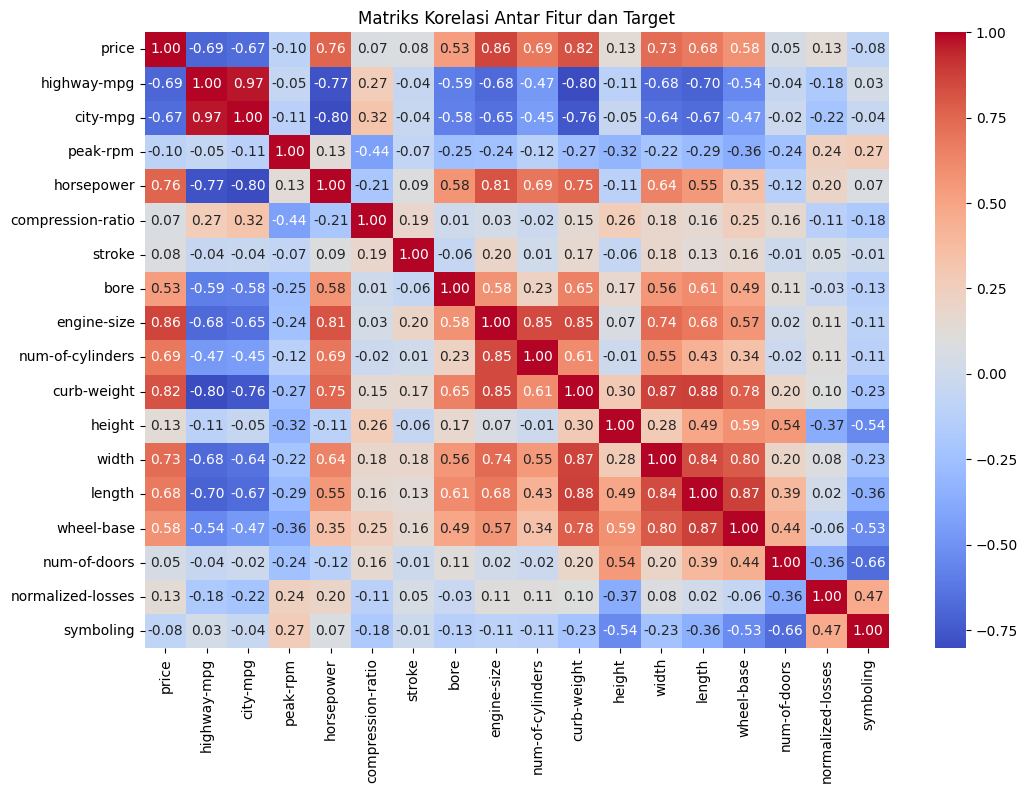


--- Korelasi dengan Symboling ---
|                   | symboling   |
|:------------------|:------------|
| symboling         | 1           |
| normalized-losses | 0.46519     |
| peak-rpm          | 0.273679    |
| horsepower        | 0.0713885   |
| highway-mpg       | 0.034606    |
| stroke            | -0.00868915 |
| city-mpg          | -0.0358226  |
| price             | -0.0822014  |
| engine-size       | -0.10579    |
| num-of-cylinders  | -0.113129   |
| bore              | -0.130083   |
| compression-ratio | -0.178515   |
| curb-weight       | -0.227691   |
| width             | -0.232919   |
| length            | -0.357612   |
| wheel-base        | -0.531954   |
| height            | -0.541038   |
| num-of-doors      | -0.663787   |


In [72]:
# prompt: Mean Squared Error (MSE): 1.079
# Root Mean Squared Error (RMSE): 1.039
# R-squared Score: 0.264
# bagaimana agar hasilnya lebih baik

# Hitung matriks korelasi
correlation_matrix = df[X_cols + ['symboling']].corr()

# Visualisasikan korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antar Fitur dan Target')
plt.show()

print("\n--- Korelasi dengan Symboling ---")
print(correlation_matrix['symboling'].sort_values(ascending=False).to_markdown(numalign="left", stralign="left"))


In [73]:
#%pip install mglearn


--- Evaluasi Model Linear Regression ---
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
R-squared (R2): 0.60

--- Koefisien Model ---
Intercept: 1.1048
Fitur dan Koefisien:
  price: 0.1175
  highway-mpg: 0.2931
  city-mpg: -0.6442
  peak-rpm: -0.0385
  horsepower: -0.1779
  compression-ratio: 0.1136
  stroke: -0.1299
  bore: -0.2313
  engine-size: 0.7278
  num-of-cylinders: -1.1010
  curb-weight: -0.0954
  height: 0.0598
  width: 0.4104
  length: 0.2323
  wheel-base: -1.1736
  num-of-doors: -0.1952
  normalized-losses: 0.3323


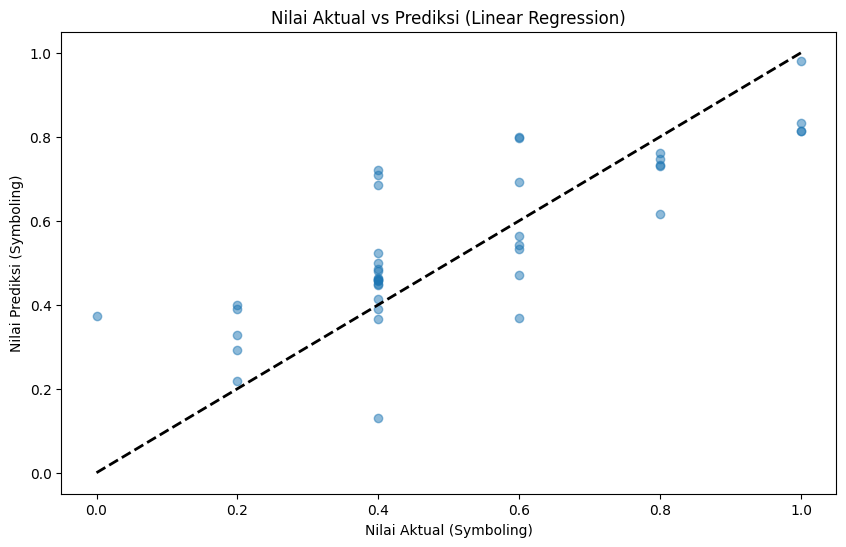

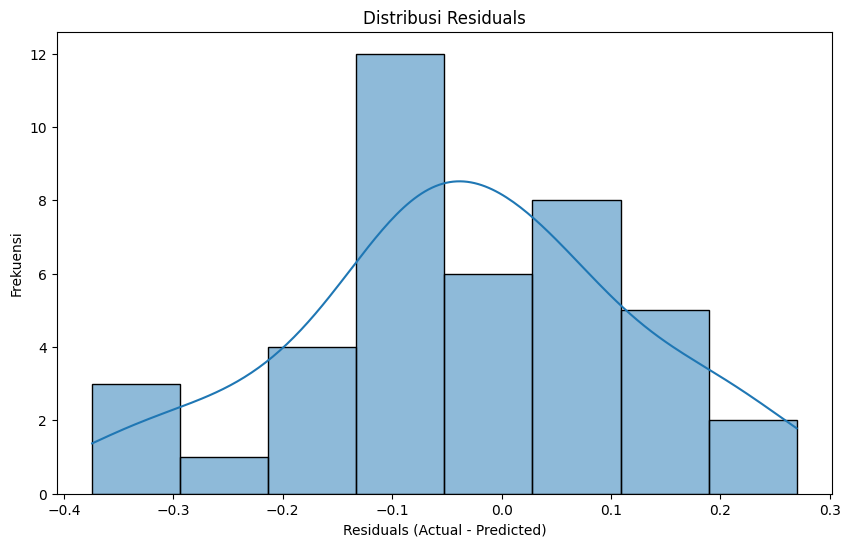

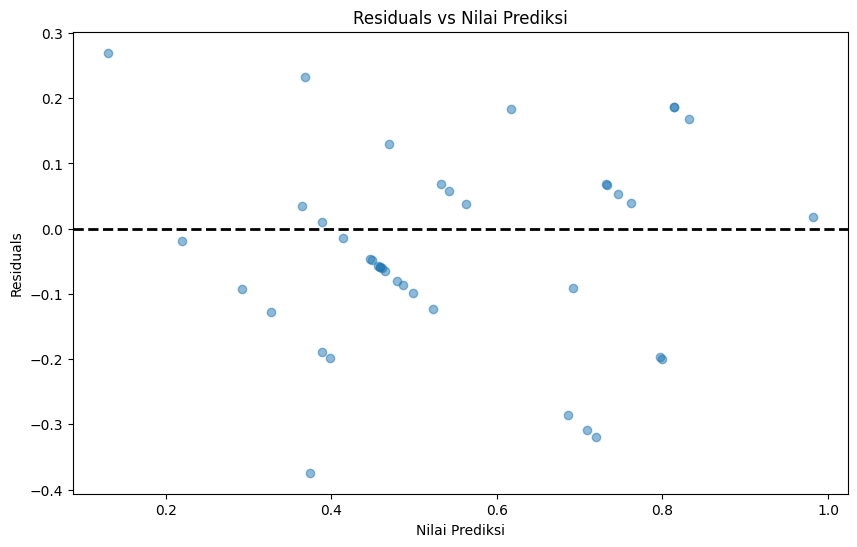

In [77]:
# prompt: buat model linear regression dengan target variable symboling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Pilih fitur (X) dan target (y)
# Menggunakan kolom numerik sebagai fitur awal. Anda mungkin perlu melakukan feature engineering
# atau seleksi fitur lebih lanjut.
# Hindari menggunakan 'symboling' sebagai fitur karena itu targetnya.
X_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'symboling' in X_cols:
    X_cols.remove('symboling')

# Jika ada kolom kategorikal yang penting, Anda perlu melakukan One-Hot Encoding
# Contoh: Mengkodekan kolom kategorikal (hanya jika relevan dan tidak memiliki terlalu banyak kategori unik)
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# Cek kembali kolom kategorikal yang mungkin perlu di-encode
# relevant_categorical_cols = ['fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system', 'make']
# # Pastikan kolom-kolom ini ada dan merupakan tipe object/category
# relevant_categorical_cols = [col for col in relevant_categorical_cols if col in df.columns and (df[col].dtype == 'object' or df[col].dtype == 'category')]

# if relevant_categorical_cols:
#     # Buat preprocessor untuk One-Hot Encoding
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('onehot', OneHotEncoder(handle_unknown='ignore'), relevant_categorical_cols)],
#         remainder='passthrough') # Biarkan kolom numerik apa adanya

#     # Gabungkan preprocessor dan model dalam pipeline
#     model = Pipeline(steps=[('preprocessor', preprocessor),
#                           ('regressor', LinearRegression())])
# else:
#     # Jika tidak ada kolom kategorikal yang relevan untuk di-encode, gunakan model langsung
#     model = LinearRegression()
#     X = df[X_cols]
#     y = df['symboling']

# Jika Anda belum siap melakukan One-Hot Encoding kompleks, mari kita mulai hanya dengan fitur numerik
X = df_standardized[X_cols]
y = df_standardized['symboling']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Linear Regression
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("\n--- Evaluasi Model Linear Regression ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Tampilkan koefisien dan intercept model
print("\n--- Koefisien Model ---")
# Jika Anda menggunakan One-Hot Encoding dengan Pipeline, Anda perlu mengakses koefisien dari regressor di pipeline
# if isinstance(model, Pipeline):
#     regressor = model.named_steps['regressor']
#     feature_names = model.named_steps['preprocessor'].get_feature_names_out()
#     coefficients = regressor.coef_
#     intercept = regressor.intercept_
#     print("Fitur dan Koefisien:")
#     for name, coef in zip(feature_names, coefficients):
#         print(f"  {name}: {coef:.4f}")
# else:
print(f"Intercept: {model.intercept_:.4f}")
print("Fitur dan Koefisien:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.4f}")

# Visualisasi hasil prediksi vs nilai aktual (opsional)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Garis identitas
plt.xlabel("Nilai Aktual (Symboling)")
plt.ylabel("Nilai Prediksi (Symboling)")
plt.title("Nilai Aktual vs Prediksi (Linear Regression)")
plt.show()

# Visualisasi residual (opsional)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Distribusi Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel("Nilai Prediksi")
plt.ylabel("Residuals")
plt.title("Residuals vs Nilai Prediksi")
plt.show()




### 1. Mean Squared Error (MSE)

MSE mengukur rata-rata dari kuadrat kesalahan. Ini adalah cara paling umum untuk mengukur error dalam model regresi.

#### Persamaan Matematika:
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

#### Penjelasan Komponen:
* $n$ : Jumlah total titik data dalam dataset Anda.
* $\sum_{i=1}^{n}$ : Simbol Sigma, yang berarti "jumlahkan semua". Dalam hal ini, kita menjumlahkan hasil perhitungan untuk setiap titik data, dari data pertama ($i=1$) hingga data terakhir ($n$).
* $y_i$ : Nilai **aktual** dari titik data ke-$i$. Ini adalah nilai sebenarnya yang ada di dataset Anda (misalnya, harga mobil yang sebenarnya).
* $\hat{y}_i$ : Nilai yang **diprediksi** oleh model Anda untuk titik data ke-$i$. Tanda topi `^` di atas $y$ menandakan bahwa ini adalah hasil prediksi, bukan nilai asli.

#### Cara Kerja Persamaan (Langkah demi Langkah):
1.  **Hitung Selisih (Error)**: Untuk setiap titik data, hitung selisih antara nilai aktual dan nilai prediksi $(y_i - \hat{y}_i)$. Selisih ini disebut juga "residual" atau "error".
2.  **Kuadratkan Error**: Hasil selisih dari langkah 1 kemudian dikuadratkan: $(y_i - \hat{y}_i)^2$. Mengapa dikuadratkan?
    * **Menghilangkan Nilai Negatif**: Agar kesalahan positif dan negatif tidak saling meniadakan.
    * **Memberi Bobot Lebih pada Kesalahan Besar**: Kesalahan yang besar (misalnya 10) akan menjadi jauh lebih signifikan (100) dibandingkan kesalahan kecil (misalnya 2, yang menjadi 4). Ini "menghukum" model yang membuat kesalahan besar.
3.  **Jumlahkan Semua Kuadrat Error**: Jumlahkan semua hasil dari langkah 2 untuk seluruh data ($\sum$).
4.  **Bagi dengan Jumlah Data**: Bagi total dari langkah 3 dengan jumlah data ($n$) untuk mendapatkan rata-rata.

**Intinya**: MSE memberi tahu Anda "rata-rata kuadrat dari kesalahan" model Anda. Semakin kecil nilainya, semakin baik.

---

### 2. Root Mean Squared Error (RMSE)

RMSE adalah akar kuadrat dari MSE. Keuntungan utamanya adalah hasilnya memiliki unit yang sama dengan variabel target, sehingga lebih mudah diinterpretasikan.

#### Persamaan Matematika:
$$\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

#### Penjelasan Komponen:
Komponennya sama persis dengan MSE.

#### Cara Kerja Persamaan:
1.  Lakukan semua langkah untuk menghitung MSE.
2.  Ambil akar kuadrat ($\sqrt{...}$) dari hasil akhir MSE.

**Intinya**: Jika target Anda adalah harga mobil dalam Rupiah, maka nilai RMSE juga akan dalam Rupiah. Misalnya, RMSE sebesar 5.000.000 berarti, secara rata-rata, prediksi model Anda meleset sekitar 5 juta Rupiah dari harga sebenarnya. Ini jauh lebih intuitif daripada unit MSE yang berupa "(Rupiah)²".

---

### 3. R-squared (R²) atau Koefisien Determinasi

R-squared mengukur proporsi (persentase) varians dalam variabel target yang dapat dijelaskan oleh fitur-fitur dalam model Anda.

#### Persamaan Matematika:
$$R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}$$

Mari kita pecah $\text{SS}_{\text{res}}$ dan $\text{SS}_{\text{tot}}$:

* **$\text{SS}_{\text{res}}$ (Sum of Squared Residuals / Jumlah Kuadrat Sisaan)**: Ini adalah jumlah kuadrat error dari model Anda. Sebenarnya ini adalah bagian pembilang dari MSE.
    $$\text{SS}_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

* **$\text{SS}_{\text{tot}}$ (Total Sum of Squares / Jumlah Kuadrat Total)**: Ini adalah jumlah kuadrat selisih antara setiap nilai aktual dengan **rata-rata dari semua nilai aktual**. Ini merepresentasikan total variasi dalam data.
    $$\text{SS}_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2$$
    * Di sini, $\bar{y}$ adalah nilai rata-rata dari semua nilai $y$ aktual.

#### Cara Kerja Persamaan:
1.  **Rasio Error**: Bagian $\frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}$ adalah rasio antara error model Anda dan total variasi data. Ini bisa diartikan sebagai "proporsi variasi yang **tidak** dapat dijelaskan oleh model".
2.  **Satu dikurangi Rasio Error**: Dengan menghitung $1 - (\text{rasio error})$, Anda mendapatkan kebalikannya, yaitu "proporsi variasi yang **dapat** dijelaskan oleh model".

**Intinya**: R-squared membandingkan model Anda dengan model yang sangat sederhana (yang hanya menebak nilai rata-rata). Nilai R² sebesar 0.75 berarti model Anda 75% lebih baik dalam menjelaskan variasi data dibandingkan jika Anda hanya menggunakan nilai rata-rata sebagai tebakan.

Tentu, ada. Model matematika di balik regresi linear cukup lugas dan menjadi dasar bagi banyak model machine learning lainnya.

Secara umum, ada dua jenis model regresi linear: **Simple Linear Regression** (dengan satu fitur) dan **Multiple Linear Regression** (dengan banyak fitur).

---

### ## 1. Simple Linear Regression (Regresi Linear Sederhana)

Model ini digunakan ketika Anda ingin memprediksi sebuah nilai target berdasarkan **satu** variabel fitur. Model ini mencari hubungan linear (berbentuk garis lurus) terbaik antara fitur dan target.

#### Persamaan Matematika:

$$Y = \beta_0 + \beta_1X + \epsilon$$

#### Penjelasan Komponen:

* **$Y$**: Variabel Dependen (Target). Ini adalah nilai yang ingin Anda prediksi (misalnya, `harga` mobil atau `symboling`).
* **$X$**: Variabel Independen (Fitur). Ini adalah variabel yang Anda gunakan untuk membuat prediksi (misalnya, `horsepower`).
* **$\beta_0$** (Beta-Nol): **Intercept** atau bias. Ini adalah nilai dari $Y$ ketika $X$ bernilai 0. Secara grafis, ini adalah titik di mana garis regresi memotong sumbu vertikal (sumbu Y).
* **$\beta_1$** (Beta-Satu): **Koefisien** atau **slope** untuk fitur $X$. Nilai ini menunjukkan seberapa besar perubahan pada $Y$ untuk setiap kenaikan satu unit pada $X$.
    * Jika $\beta_1$ positif, maka $Y$ akan meningkat seiring dengan peningkatan $X$.
    * Jika $\beta_1$ negatif, maka $Y$ akan menurun seiring dengan peningkatan $X$.
* **$\epsilon$** (Epsilon): **Error Term** (Sisaan atau Galat). Ini adalah bagian dari $Y$ yang tidak dapat dijelaskan oleh model. Ini adalah selisih antara nilai $Y$ aktual dan nilai $Y$ yang diprediksi oleh garis regresi.

**Tujuan Model**: Tujuan utama dari proses *training* adalah untuk menemukan nilai **$\beta_0$** dan **$\beta_1$** yang paling optimal, yaitu yang menghasilkan garis lurus yang paling pas dengan sebaran data, atau dengan kata lain, yang meminimalkan total error ($\epsilon$).

---

### ## 2. Multiple Linear Regression (Regresi Linear Berganda)

Model ini adalah perluasan dari regresi linear sederhana. Digunakan ketika Anda memiliki **lebih dari satu** variabel fitur untuk memprediksi sebuah nilai target.

#### Persamaan Matematika:

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon$$

#### Penjelasan Komponen:

* **$Y$**, **$\beta_0$**, dan **$\epsilon$** memiliki arti yang sama seperti pada regresi linear sederhana.
* **$X_1, X_2, ..., X_p$**: Ini adalah variabel-variabel fitur yang Anda gunakan (misalnya, $X_1$ adalah `horsepower`, $X_2$ adalah `curb-weight`, dst.).
* **$\beta_1, \beta_2, ..., \beta_p$**: Ini adalah koefisien untuk masing-masing fitur. Nilai $\beta_j$ menunjukkan seberapa besar perubahan pada $Y$ untuk setiap kenaikan satu unit pada $X_j$, **dengan asumsi semua fitur lainnya tetap konstan**.

**Tujuan Model**: Sama seperti sebelumnya, tujuannya adalah untuk menemukan nilai koefisien terbaik ($\beta_0, \beta_1, ..., \beta_p$) yang meminimalkan total error. Alih-alih mencari "garis" terbaik, model ini mencari "hyperplane" (bidang datar dalam ruang multi-dimensi) terbaik yang paling pas dengan data.

### Bagaimana Model "Belajar" Nilai Koefisien (β)?

Model "belajar" dengan cara meminimalkan sebuah **Fungsi Biaya (Cost Function)**. Untuk regresi linear, fungsi biaya yang paling umum digunakan adalah **Mean Squared Error (MSE)**.

Proses untuk menemukan nilai Beta (β) yang meminimalkan MSE ini biasanya dilakukan dengan salah satu dari dua metode utama:
1.  **Ordinary Least Squares (OLS)**: Metode statistik yang secara matematis langsung menghitung nilai Beta (β) yang optimal.
2.  **Gradient Descent**: Algoritma optimasi yang dimulai dengan nilai Beta (β) acak, lalu secara berulang-ulang menyesuaikan nilai-nilai tersebut sedikit demi sedikit ke arah yang paling cepat mengurangi error, hingga mencapai titik error terendah.